<a href="https://colab.research.google.com/github/nabilnehme/AAI614_Nehme/blob/main/Week3/AAI614O_Nabil_Nehme_Outliers_Detection_with_IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Outliers Detection with IQR**

Dataset used: https://www.kaggle.com/datasets/sahirmaharajj/employee-salaries-analysis/data



In [5]:
import kagglehub

path = kagglehub.dataset_download("sahirmaharajj/employee-salaries-analysis")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sahirmaharajj/employee-salaries-analysis/versions/2


In [6]:
import pandas as pd

# Defining the dataset path
dataset_path = f"{path}/Employee_Salaries.csv"

# Load the dataset
df = pd.read_csv(dataset_path)

# Print the DataFrame
print("First few rows of the dataset:")
print(df.head())
df

First few rows of the dataset:
  Department            Department_Name                        Division  \
0        ABS  Alcohol Beverage Services           ABS 85 Administration   
1        ABS  Alcohol Beverage Services           ABS 85 Administration   
2        ABS  Alcohol Beverage Services           ABS 85 Administration   
3        ABS  Alcohol Beverage Services  ABS 85 Administrative Services   
4        ABS  Alcohol Beverage Services  ABS 85 Administrative Services   

  Gender  Base_Salary  Overtime_Pay  Longevity_Pay Grade  
0      M   175873.000          0.00            0.0    M2  
1      M   145613.360          0.00            0.0    M3  
2      F   136970.000          0.00            0.0    M3  
3      F    89432.694          0.00         2490.0    21  
4      F    78947.000        456.68         6257.7    16  


,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.0000,0.00,0.00,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.3600,0.00,0.00,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.0000,0.00,0.00,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.6940,0.00,2490.00,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.0000,456.68,6257.70,16
...,...,...,...,...,...,...,...,...
10286,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.0000,0.00,0.00,N28
10287,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Director,F,215032.1000,0.00,0.00,NaN
10288,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Office of Zoning and Administrative Hea...,F,84365.5529,0.00,0.00,N18
10289,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,F,98228.0000,0.00,1596.27,N21


Numeric Features:
   Base_Salary  Overtime_Pay  Longevity_Pay
0   175873.000          0.00            0.0
1   145613.360          0.00            0.0
2   136970.000          0.00            0.0
3    89432.694          0.00         2490.0
4    78947.000        456.68         6257.7


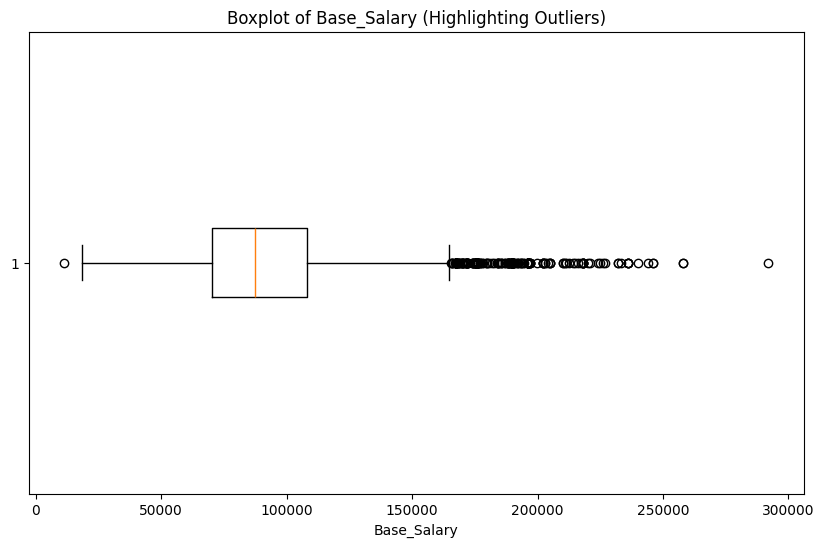

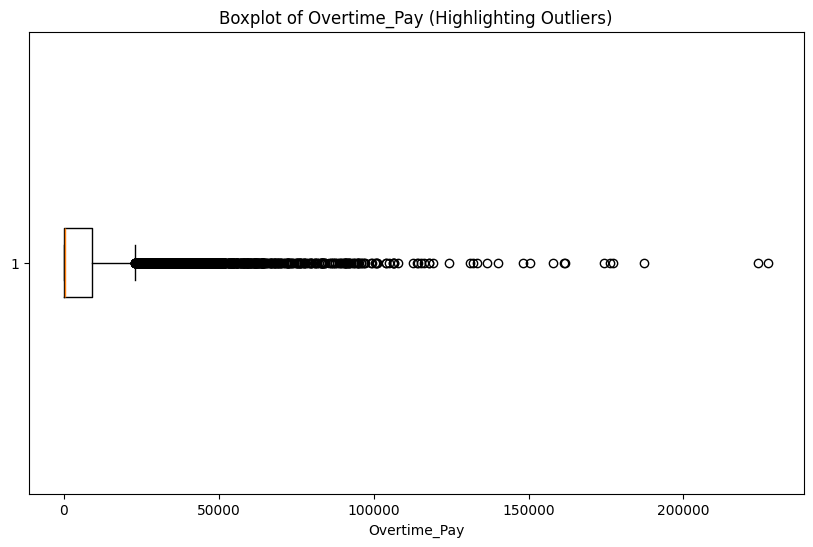

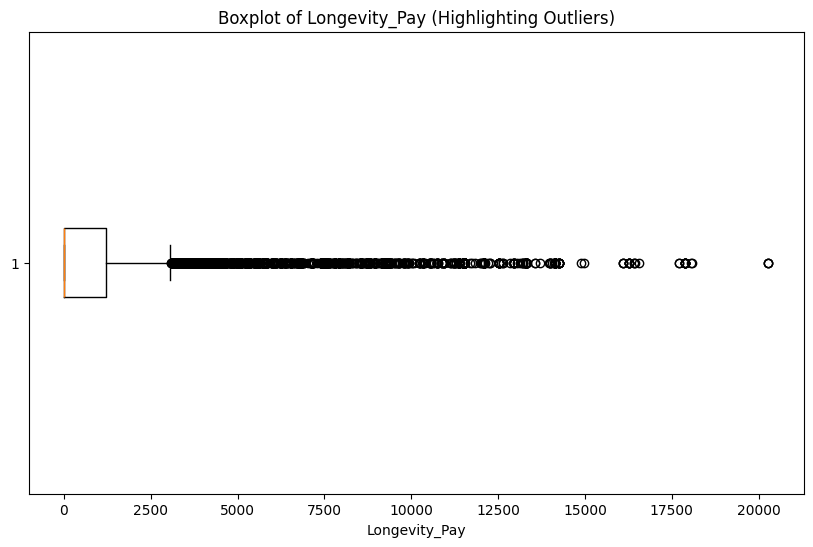


Outlier Summary for All Numeric Features:
                    Q1         Q3       IQR  Lower Bound  Upper Bound  \
Base_Salary    70023.0  108084.00  38061.00    12931.500   165175.500   
Overtime_Pay       0.0    9190.97   9190.97   -13786.455    22977.425   
Longevity_Pay      0.0    1225.68   1225.68    -1838.520     3064.200   

               Num Outliers  Num Non-Outliers  
Base_Salary           254.0           10037.0  
Overtime_Pay         1196.0            9095.0  
Longevity_Pay        1985.0            8306.0  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_features = df.select_dtypes(include=['float64', 'int64'])

print("Numeric Features:")
print(numeric_features.head())

# Apply IQR method to each numeric feature
outlier_summary = {}
for column in numeric_features.columns:
    Q1 = numeric_features[column].quantile(0.25)  # 25th percentile
    Q3 = numeric_features[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range

    # Define bounds for non-outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = numeric_features[(numeric_features[column] < lower_bound) | (numeric_features[column] > upper_bound)]
    non_outliers = numeric_features[(numeric_features[column] >= lower_bound) & (numeric_features[column] <= upper_bound)]

    # Store results for the column
    outlier_summary[column] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Num Outliers': len(outliers),
        'Num Non-Outliers': len(non_outliers),
    }

    # Visualize the column's distribution with a boxplot
    plt.figure(figsize=(10, 6))
    plt.boxplot(numeric_features[column].dropna(), vert=False)
    plt.title(f"Boxplot of {column} (Highlighting Outliers)")
    plt.xlabel(column)
    plt.show()

# Display the outlier summary for all features
outlier_summary_df = pd.DataFrame(outlier_summary).T  # Transpose for readability
print("\nOutlier Summary for All Numeric Features:")
print(outlier_summary_df)

# Optional: Save the summary to a CSV file
outlier_summary_df.to_csv("outlier_summary.csv")


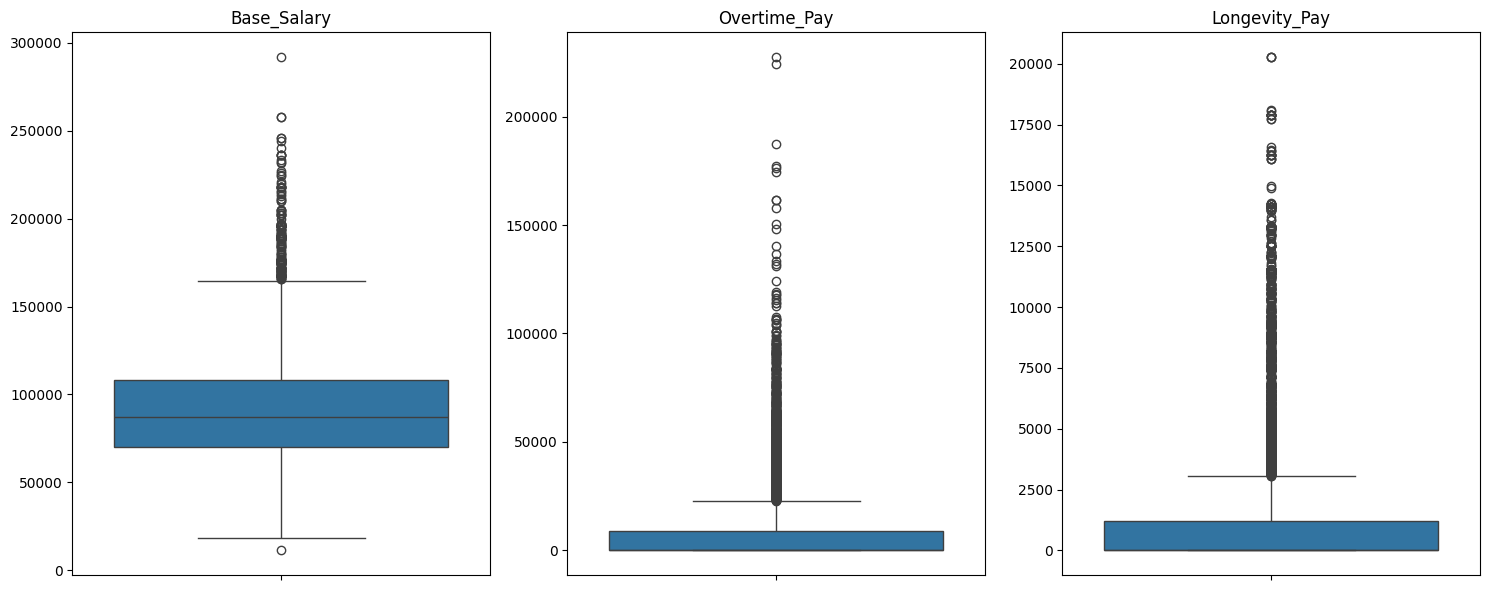

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric features
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Initialize a figure for the boxplots
plt.figure(figsize=(15, 6))

# Create boxplots for each numeric feature
for i, column in enumerate(numeric_features.columns, 1):
    plt.subplot(1, len(numeric_features.columns), i)
    sns.boxplot(y=numeric_features[column])
    plt.title(column)
    plt.ylabel("")

# Adjust spacing between plots
plt.tight_layout()

# Show the boxplots
plt.show()
